#环境介绍
本示例运行在google colap。

#本示例概要
本示例主要是带领大家如何在雲端實現語音轉文字的功能，在ETL需要大量的語音轉文字進行訓練，就可以透過Whisper進行批量實現，那我们接着来实作吧。在 Google Colab 上使用 OpenAI 的 Whisper 进行语音转文字（Speech-to-Text，STT）任务，可以按照以下步骤进行：

1️⃣安装依赖
在 Colab 的代码单元中运行：

In [ ]:
!pip install -q openai-whisper
!pip install -q ffmpeg

Whisper 需要 ffmpeg 进行音频处理，因此也需要安装它。

2️⃣ 步骤 2：范例代码

In [4]:
import whisper
import torch
from google.colab import files

# 选择 GPU（如果可用）
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# 加载 Whisper 模型
"""
Whisper 模型有不同大小（ ['tiny.en', 'tiny', 'base.en', 'base', 'small.en', 'small', 'medium.en',
'medium', 'large-v1', 'large-v2', 'large-v3', 'large', 'large-v3-turbo', 'turbo']），
如果方言數據不算特別多，建議選擇 Medium 或更小的模型做微調，否則容易過擬合或直接訓不動（算力要求高）。
如果方言數據相當多，或者對識別準確率要求很高，可以考慮基於 Large 模型微調，但需要足夠 GPU/TPU 資源。
"""
model = whisper.load_model("medium").to(device)

# 上传音频文件，在 Colab 界面手动上传音频,Whisper 适用于 MP3、WAV、M4A、WEBM 等格式的音频文件。
uploaded = files.upload()
audio_path = list(uploaded.keys())[0]
print("Uploaded file:", audio_path)

# 进行语音识别 ,这个 transcribe 方法会自动检测语言并转换成文本。
"""
如果明确知道音频语言，可以指定以提高准确率（例如处理中文音频）：
result = model.transcribe(audio_path, language="zh")
print(result["text"])
"""
result = model.transcribe(audio_path)
print("\nTranscription:\n", result["text"])

# 可选：输出带时间戳的文本,如果需要字幕（SRT）格式，可以使用 segments
for segment in result["segments"]:
    print(f"[{segment['start']:.2f}s - {segment['end']:.2f}s]: {segment['text']}")

# 保存文本到文件
with open("transcription.txt", "w", encoding="utf-8") as f:
    f.write(result["text"])


Using device: cpu


100%|█████████████████████████████████████| 1.42G/1.42G [00:19<00:00, 76.8MiB/s]


Saving a.m4a to a.m4a
Uploaded file: a.m4a


/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")



Transcription:
 萬事只求半乘心
[0.00s - 5.00s]: 萬事只求半乘心



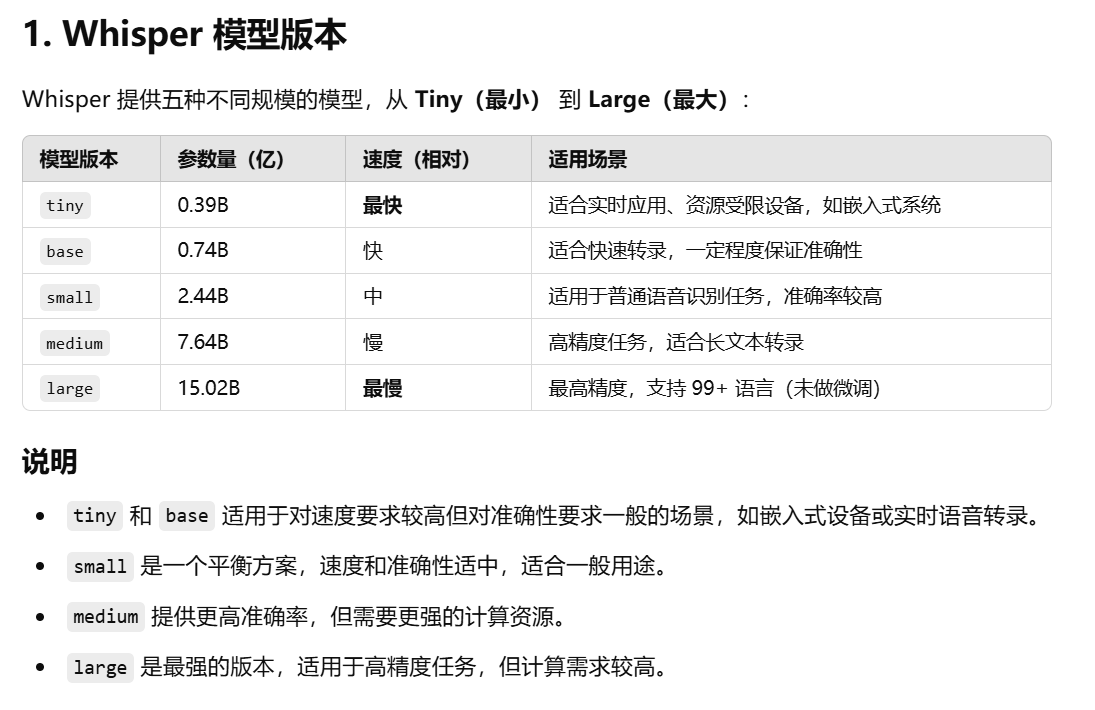